<a href="https://colab.research.google.com/github/hrhm47/foodRecommendationSystemPractice/blob/codeBranch/FoodRecomenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import difflib
import numpy as np
import pickle


In [4]:
recipe_data = pd.read_csv('/content/RAW_recipes.csv',header=0,sep=",")

recipe_data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
user_data = pd.read_csv('/content/PP_users.csv',header=0,sep=",")
user_data.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


**Data Preparation and Exploration**

In [6]:
def getRecipeRatings(idx):
  user_items = [int(s) for s in user_data.loc[idx]['items'].replace('[','').replace(']','').replace(',','').split()]
  user_ratings = [float(s) for s in user_data.loc[idx]['ratings'].replace('[','').replace(']','').replace(',','').split()]
  df = pd.DataFrame(list(zip(user_items,user_ratings)),columns = ['Item','Rating'])
  df.insert(loc=0,column='User',value = user_data.loc[idx].u)
  return df

In [48]:
recipe_ratings = pd.DataFrame(columns=['User', 'Item', 'Rating'])
for idx, row in user_data.iterrows():
    recipe_ratings = pd.concat([recipe_ratings, getRecipeRatings(row['u'])], ignore_index=True)


<ipython-input-48-9fbd3f83ea07>:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  recipe_ratings = pd.concat([recipe_ratings, getRecipeRatings(row['u'])], ignore_index=True)


In [31]:
# recipe_ratings = pd.read_pickle('/content/ingr_map.pkl')
# # print(recipe_ratings.count)
# print(recipe_ratings.columns)

Index(['raw_ingr', 'raw_words', 'processed', 'len_proc', 'replaced', 'count',
       'id'],
      dtype='object')


<Axes: xlabel='count', ylabel='count'>

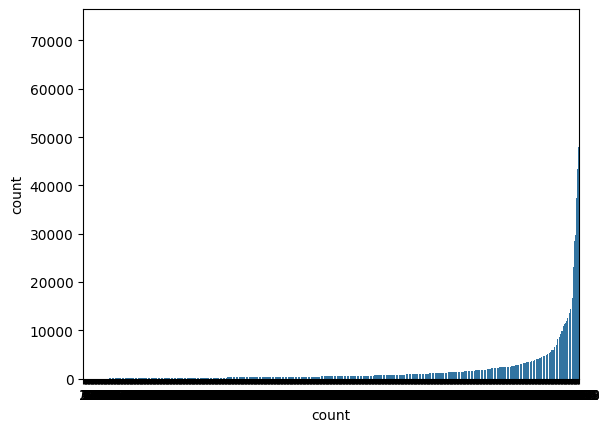

In [37]:
import seaborn as sns

# Assuming 'recipe_ratings' is your DataFrame
sns.barplot(x=recipe_ratings['count'],
            y=recipe_ratings['count'])


In [50]:
recipe_counts = recipe_ratings.groupby(['Item']).size()
filtered_recipes = recipe_counts[recipe_counts>30]
filtered_recipes_list = filtered_recipes.index.tolist()
filtered_recipes_list = filtered_recipes.index.tolist()
len(filtered_recipes_list)

2349

In [54]:
recipe_ratings = recipe_ratings[recipe_ratings['Item'].isin(filtered_recipes_list)]

In [55]:
recipe_ratings.count()

,0
User,174359
Item,174359
Rating,174359


<Axes: xlabel='Rating', ylabel='count'>

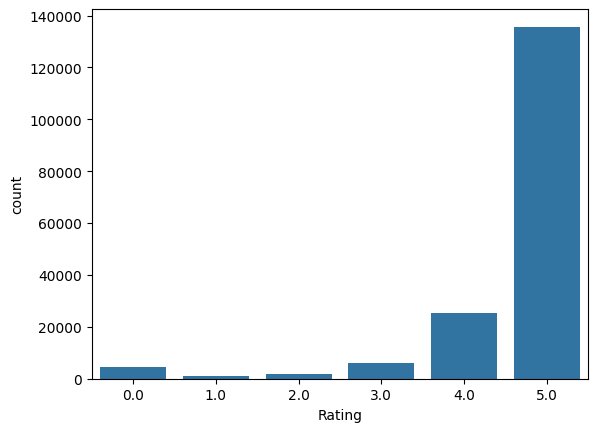

In [57]:
sns.barplot(x=recipe_ratings.Rating.value_counts().index, y=recipe_ratings.Rating.value_counts())

In [45]:
!pip install surprise

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise.model_selection import cross_validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357267 sha256=2f2903e7c8e789d85582a93bd9a1efe8c7f79df3d0bf66da43b929392c44db0a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [92]:
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(recipe_ratings[['User', 'Item', 'Rating']], reader)
print(data.df.head())

   User   Item  Rating
1     0  27680     5.0
21    0  90038     5.0
23    0  71578     5.0
26    0  27749     5.0
29    0  89385     5.0


In [59]:
trainSet = data.build_full_trainset()

algo = NormalPredictor()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2159  1.2329  1.2266  1.2203  1.2155  1.2222  0.0067  
MAE (testset)     0.7867  0.7959  0.7913  0.7924  0.7840  0.7901  0.0042  
Fit time          0.19    0.40    0.37    0.41    0.39    0.35    0.08    
Test time         0.17    0.65    0.29    0.64    0.34    0.42    0.19    


{'test_rmse': array([1.21589965, 1.23292192, 1.2265805 , 1.22026937, 1.21551248]),
 'test_mae': array([0.78674822, 0.79586517, 0.79130789, 0.79244947, 0.78401233]),
 'fit_time': (0.19339632987976074,
  0.398085355758667,
  0.36759400367736816,
  0.40828824043273926,
  0.39478015899658203),
 'test_time': (0.16758179664611816,
  0.6469578742980957,
  0.2866494655609131,
  0.6434652805328369,
  0.3409113883972168)}

In [60]:
anti_testset_user = []
targetUser = 0 #inner_id of the target user
fillValue = trainSet.global_mean
user_item_ratings = trainSet.ur[targetUser]
user_items = [item for (item,_) in (user_item_ratings)]
user_items
ratings = trainSet.all_ratings()
for iid in trainSet.all_items():
  if(iid not in user_items):
    anti_testset_user.append((trainSet.to_raw_uid(targetUser),trainSet.to_raw_iid(iid),fillValue))


In [61]:
predictions = algo.test(anti_testset_user)

In [62]:
predictions[10]

Prediction(uid=0, iid=102591, r_ui=4.602159911447072, est=4.9593122156882625, details={'was_impossible': False})

In [63]:
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
recipe_list = pred.head(10)['iid'].to_list()
recipe_data.loc[recipe_list]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
79996,elderberry muffins,394509,30,283251,2009-10-13,"['30-minutes-or-less', 'time-to-make', 'course...","[250.1, 14.0, 78.0, 8.0, 9.0, 11.0, 12.0]",2,"['cream sugar and oleo , add additional ingred...",from my recipe files. uses dried elderberries.,"['sugar', 'oleo', 'milk', 'egg', 'nutmeg', 'fl...",12
175886,roasted pig stomach,232856,320,29655,2007-06-06,"['course', 'main-ingredient', 'cuisine', 'occa...","[557.5, 69.0, 6.0, 142.0, 53.0, 75.0, 2.0]",11,"['if not already done , remove inner lining fr...","i don't know what's better, the dish or the lo...","['pig stomach', 'water', 'salt', 'ground sausa...",8
119308,lamb and pepper stir fry,65531,23,81885,2003-06-25,"['30-minutes-or-less', 'time-to-make', 'course...","[391.9, 45.0, 19.0, 18.0, 42.0, 56.0, 3.0]",14,['in a small bowl mix the soy sauce and honey'...,this is from a weight watchers recipe book. it...,"['soy sauce', 'honey', 'vegetable oil', 'bonel...",14
48398,chinese five spice almonds,416480,13,491979,2010-03-14,"['15-minutes-or-less', 'time-to-make', 'course...","[220.4, 30.0, 6.0, 16.0, 14.0, 8.0, 2.0]",5,['heat the oil in a large nonstick skillet ove...,from the best make ahead recipes,"['extra virgin olive oil', 'almonds', 'chinese...",5
118001,kittencal s cabbage and noodles,214510,50,89831,2007-03-01,"['60-minutes-or-less', 'time-to-make', 'course...","[519.7, 32.0, 37.0, 11.0, 32.0, 60.0, 22.0]",12,['cook the egg noodles according to package di...,this recipe goes back over 20 years and i stil...,"['wide egg noodles', 'butter', 'onions', 'suga...",9
63463,creamy parmesan corn casserole,86993,45,24386,2004-03-19,"['60-minutes-or-less', 'time-to-make', 'course...","[427.7, 43.0, 7.0, 21.0, 20.0, 85.0, 12.0]",7,['place corn and half and half in a large sauc...,this is a great casserole side dish that can b...,"['frozen corn kernels', 'half-and-half', 'butt...",8
169138,quick n easy curried shrimp,13937,35,5523,2001-11-07,"['60-minutes-or-less', 'time-to-make', 'main-i...","[436.7, 48.0, 9.0, 11.0, 53.0, 92.0, 4.0]",7,"['in a large non-stick fry pan , melt butter ,...",a good friend gave me this recipe about 3 year...,"['butter', 'curry powder', 'onion', 'celery', ...",9
120400,leafy green strudel,83645,60,5060,2004-02-11,"['60-minutes-or-less', 'time-to-make', 'course...","[301.9, 31.0, 7.0, 18.0, 14.0, 19.0, 8.0]",19,"['preheat oven to 450f', 'in a large , nonstic...",so good! use any combination of greens you wis...,"['olive oil', 'sweet onion', 'garlic cloves', ...",14
104789,herb grilled tomatoes,65598,20,73538,2003-06-26,"['30-minutes-or-less', 'time-to-make', 'course...","[55.2, 4.0, 10.0, 2.0, 4.0, 7.0, 2.0]",13,['remove cores from tomatoes and cut tomatoes ...,NaN,"['tomatoes', 'sour cream', 'fresh basil', 'fin...",5
153178,parmesean grilled cheese,455776,15,1024930,2011-05-11,"['15-minutes-or-less', 'time-to-make', 'course...","[358.7, 31.0, 9.0, 25.0, 35.0, 60.0, 8.0]",8,"['heat a skillet on medium heat', 'spread one ...","it was late and i was craving comfort food, bu...","['white bread', 'cheddar cheese', 'parmesan ch...",5


In [93]:
sim_options = {'name': 'MSD',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBasic(sim_options=sim_options)
# Run 5-fold cross-validation and print results
# print(data.reader)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0327  1.0228  1.0090  1.0169  1.0287  1.0220  0.0085  
MAE (testset)     0.5529  0.5468  0.5429  0.5458  0.5474  0.5472  0.0033  
Fit time          0.94    2.02    0.63    0.61    0.63    0.96    0.54    
Test time         6.56    8.12    2.04    2.06    3.17    4.39    2.49    


{'test_rmse': array([1.03274627, 1.0228202 , 1.00895542, 1.01685187, 1.02872254]),
 'test_mae': array([0.55291351, 0.54681398, 0.54290322, 0.545751  , 0.54744062]),
 'fit_time': (0.9399361610412598,
  2.022819995880127,
  0.6266405582427979,
  0.607072114944458,
  0.6250107288360596),
 'test_time': (6.561420202255249,
  8.115524768829346,
  2.040863037109375,
  2.0614798069000244,
  3.172373056411743)}

In [94]:
predictions = algo.test(anti_testset_user)
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
recipe_list = pred.head(10)['iid'].to_list()
recipe_data.loc[recipe_list]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
122140,lemon raspberry yogurt muffins,125573,28,69474,2005-06-11,"['30-minutes-or-less', 'time-to-make', 'course...","[194.3, 8.0, 56.0, 13.0, 8.0, 15.0, 10.0]",11,"['combine eggs , milk , yogurt , butter and va...",i think i found this in a gooseberry patch coo...,"['eggs', 'milk', 'lemon yogurt', 'butter', 'le...",11
28206,bread maker italian herb bread 1 5 lbs,493465,185,900992,2013-01-11,"['time-to-make', 'course', 'main-ingredient', ...","[159.0, 4.0, 6.0, 6.0, 7.0, 2.0, 9.0]",2,['add ingredients to break maker pan in the or...,for 1.5 lb loaves,"['water', 'olive oil', 'sugar', 'salt', 'dried...",7
120664,leeks and parsnips sauteed or creamed,170895,27,8377,2006-05-31,"['30-minutes-or-less', 'time-to-make', 'course...","[138.6, 14.0, 10.0, 27.0, 4.0, 29.0, 4.0]",21,['clean the leeks and discard the dark green p...,this is good sauteed only or creamed. very eas...,"['leeks', 'butter', 'garlic cloves', 'parsnips...",9
98446,grilled cheese sandwich pie,384667,37,124416,2009-08-09,"['weeknight', '60-minutes-or-less', 'time-to-m...","[471.8, 32.0, 0.0, 75.0, 46.0, 61.0, 15.0]",14,"['in small mixing bowl , combine egg , flour ,...","when you're not in the mood to cook, this is t...","['egg', 'flour', 'salt', 'pepper', 'milk', 'ch...",6
19807,bed breakfast baked eggs,114474,65,56118,2005-03-28,"['time-to-make', 'course', 'main-ingredient', ...","[183.5, 19.0, 11.0, 12.0, 22.0, 35.0, 2.0]",5,"['mix together the eggs , milk and sugar', 'ad...",a very easy and very yummy egg dish to serve f...,"['eggs', '1% low-fat milk', 'sugar', 'colby-mo...",9
7751,apples n cheese casserole,3225,0,1534,1999-10-08,"['15-minutes-or-less', 'time-to-make', 'course...","[2646.8, 222.0, 873.0, 168.0, 98.0, 460.0, 98.0]",6,"['place apples in a greased casserole dish', '...",NaN,"['apples for pie', 'butter', 'sugar', 'velveet...",6
9917,asparagus tarts,375703,45,1260758,2009-06-03,"['60-minutes-or-less', 'time-to-make', 'course...","[624.2, 65.0, 17.0, 16.0, 31.0, 61.0, 15.0]",17,['heat oven to 375f line 2 large baking hseets...,"these pretty, savory tarts are a nice side dis...","['asparagus', 'olive oil', 'herbes de provence...",9
168030,quick easy beef in black bean sauce,98414,30,36134,2004-08-24,"['30-minutes-or-less', 'time-to-make', 'course...","[87.5, 6.0, 21.0, 8.0, 4.0, 4.0, 3.0]",17,['using a very sharp knife slice beef very thi...,i have worked with a lot of asians and one fri...,"['peanut oil', 'lean rump steak', 'onion', 'ca...",13
171614,real mexican enchiladas,113727,120,171303,2005-03-18,"['time-to-make', 'course', 'cuisine', 'prepara...","[527.0, 33.0, 42.0, 83.0, 60.0, 38.0, 18.0]",22,"['for the tortillas , in a large bowl combine ...","this recipe is posted by request, and is from ...","['masa corn flour', 'unsifted all-purpose flou...",19
113525,jack daniel s cedar plank salmon,359869,60,810983,2009-03-09,"['60-minutes-or-less', 'time-to-make', 'course...","[432.3, 10.0, 201.0, 65.0, 66.0, 6.0, 17.0]",22,['soak cedar planks in salted water for at lea...,"delicious salmon grilled on a cedar plank, sea...","['salmon fillets', 'cedar planks', 'honey dijo...",15


In [95]:
algo = SVD()
# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9526  0.9554  0.9542  0.9600  0.9750  0.9594  0.0082  
MAE (testset)     0.5580  0.5588  0.5547  0.5596  0.5630  0.5588  0.0027  
Fit time          3.20    4.51    4.16    2.95    2.95    3.55    0.65    
Test time         0.29    0.43    0.24    0.24    0.25    0.29    0.07    


{'test_rmse': array([0.95256994, 0.95539396, 0.95421388, 0.95999273, 0.97504107]),
 'test_mae': array([0.55799979, 0.55884422, 0.55467237, 0.55959404, 0.56304502]),
 'fit_time': (3.204923629760742,
  4.5069146156311035,
  4.155869007110596,
  2.9522500038146973,
  2.9492321014404297),
 'test_time': (0.2900049686431885,
  0.42900609970092773,
  0.23767638206481934,
  0.2425851821899414,
  0.24965763092041016)}

In [96]:
predictions = algo.test(anti_testset_user)
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
recipe_list = pred.head(10)['iid'].to_list()
recipe_data.loc[recipe_list]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
145683,nutter butter bon bons,212955,25,67103,2007-02-21,"['30-minutes-or-less', 'time-to-make', 'course...","[162.7, 15.0, 54.0, 4.0, 6.0, 21.0, 5.0]",8,['beat peanut butter and butter at medium spee...,this recipe took the grand prize at the 2004 n...,"['creamy peanut butter', 'butter', 'golden gra...",5
5589,anjou salad,295815,25,704950,2008-04-02,"['30-minutes-or-less', 'time-to-make', 'course...","[232.5, 12.0, 108.0, 0.0, 9.0, 3.0, 13.0]",4,"['in a large bowl', 'mix balsamic , honey , va...",i love the fresh fruit this time of year!! i ...,"['fresh pears', 'fresh strawberries', 'balsami...",7
9771,asparagus chicken with hollandaise sauce,98278,35,88099,2004-08-20,"['60-minutes-or-less', 'time-to-make', 'course...","[287.0, 19.0, 4.0, 13.0, 67.0, 33.0, 1.0]",9,['to marinate: place chicken in a nonporous gl...,this recipe came from another recipe site. it ...,"['boneless skinless chicken breast halves', 'c...",6
170446,ranch cheese ball,308371,5,856902,2008-06-09,"['15-minutes-or-less', 'time-to-make', 'course...","[2038.5, 300.0, 5.0, 85.0, 124.0, 617.0, 4.0]",4,"['soften cream cheese , stir in ranch mix and ...","my aunt always made this recipe, her mother al...","['cream cheese', 'dry ranch dressing mix', 'ch...",4
9143,asian californian mexican faux crab salad,239467,15,21752,2007-07-09,"['15-minutes-or-less', 'time-to-make', 'course...","[108.0, 13.0, 7.0, 0.0, 3.0, 6.0, 2.0]",15,"['in a glass bowl , toss together the ingredie...",i found a recipe on a fun food blog -- singleg...,"['red pepper', 'tomatoes', 'scallions', 'garli...",15
72081,dijon potato salad,360260,30,653438,2009-03-11,"['30-minutes-or-less', 'time-to-make', 'course...","[195.9, 10.0, 6.0, 2.0, 7.0, 4.0, 10.0]",12,['place a steamer basket in a saucepan filled ...,another recipe i found in everyday food. i ha...,"['new potatoes', 'white wine vinegar', 'dijon ...",6
46722,chicken artichoke and sun dried tomato with p...,343395,25,1062471,2008-12-14,"['30-minutes-or-less', 'time-to-make', 'course...","[1100.2, 45.0, 20.0, 39.0, 160.0, 31.0, 45.0]",10,['fill a large saucepan with water and bring t...,"this is a recipe that i made up, using whateve...","['angel hair pasta', 'olive oil', 'boneless sk...",11
31607,burnt tongue bbq sauce,67025,1620,93190,2003-07-18,"['weeknight', 'time-to-make', 'course', 'main-...","[1826.8, 3.0, 1047.0, 350.0, 18.0, 1.0, 153.0]",12,['combine all ingredients in a large saucepan'...,this bbq sauce has a nice sweet flavor combine...,"['ketchup', 'distilled white vinegar', 'dark c...",14
5855,antioxidant soup all ingredients are to be or...,252401,240,583584,2007-09-11,"['time-to-make', 'course', 'main-ingredient', ...","[98.6, 1.0, 26.0, 7.0, 7.0, 0.0, 7.0]",13,['put the roasted vegetable stock and water in...,"this soup is so good, you won't miss the meat....","['vegetable stock', 'water', 'garlic cloves', ...",18
82291,farmgirl s funky chicken,84495,140,95567,2004-02-20,"['time-to-make', 'main-ingredient', 'preparati...","[749.2, 74.0, 67.0, 60.0, 113.0, 66.0, 7.0]",10,"['preheat oven to 450', 'wash and dry chicken'...","easy, tasty, hearty chicken recipe. when time ...","['chicken', 'relish', 'salt', 'oil', 'ground b...",6


In [97]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [100,150],
              'n_epochs': [20,25,30],
              'lr_all':[0.005,0.01,0.1],
              'reg_all':[0.02,0.05,0.1]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
grid_search.fit(data)

In [98]:
print(grid_search.best_score['rmse'])
print(grid_search.best_score['mae'])

0.9544896570463285
0.555520903001562


In [100]:
# save the model to disk
pickle.dump(grid_search, open('/content/surprise_grid_search_svd.sav', 'wb'))
#Load the model from disk
grid_search = pickle.load(open('/content/surprise_grid_search_svd.sav', 'rb'))

In [101]:
print(grid_search.best_params['rmse'])

{'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}


In [103]:
algo = grid_search.best_estimator['rmse']

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9566  0.9550  0.9322  0.9622  0.9515  0.9515  0.0103  
MAE (testset)     0.5556  0.5577  0.5509  0.5611  0.5559  0.5563  0.0033  
Fit time          3.13    2.99    5.78    4.17    2.95    3.81    1.09    
Test time         0.23    0.25    0.80    0.25    0.57    0.42    0.23    


{'test_rmse': array([0.95663964, 0.95500376, 0.93215428, 0.9622146 , 0.95151774]),
 'test_mae': array([0.5556131 , 0.55773911, 0.55093231, 0.56112166, 0.55591105]),
 'fit_time': (3.1305928230285645,
  2.9934167861938477,
  5.7840576171875,
  4.171232461929321,
  2.9485015869140625),
 'test_time': (0.23443007469177246,
  0.2548940181732178,
  0.8014960289001465,
  0.24522137641906738,
  0.5731425285339355)}